# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [7]:
#Type your code here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, make_scorer, precision_score, fbeta_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import GridSearchCV
import numpy as np
import joblib
import json
import mlflow

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [8]:
#Type your code here
df = pd.read_csv('../creditcard_raw.csv')
print(f"Dataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
df.head()

Dataset shape: (284807, 31)
Columns: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [9]:
#Type your code here
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
# Menampilkan statistik deskriptif dari dataset
df.describe(include="all")

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [11]:
# Mengecek missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_data = pd.DataFrame({
    'Missing Values' : missing_values,
    'percentage' : missing_percentage
}).sort_values(by='Missing Values', ascending=False)

missing_data[missing_data['Missing Values'] > 0]



,Missing Values,percentage


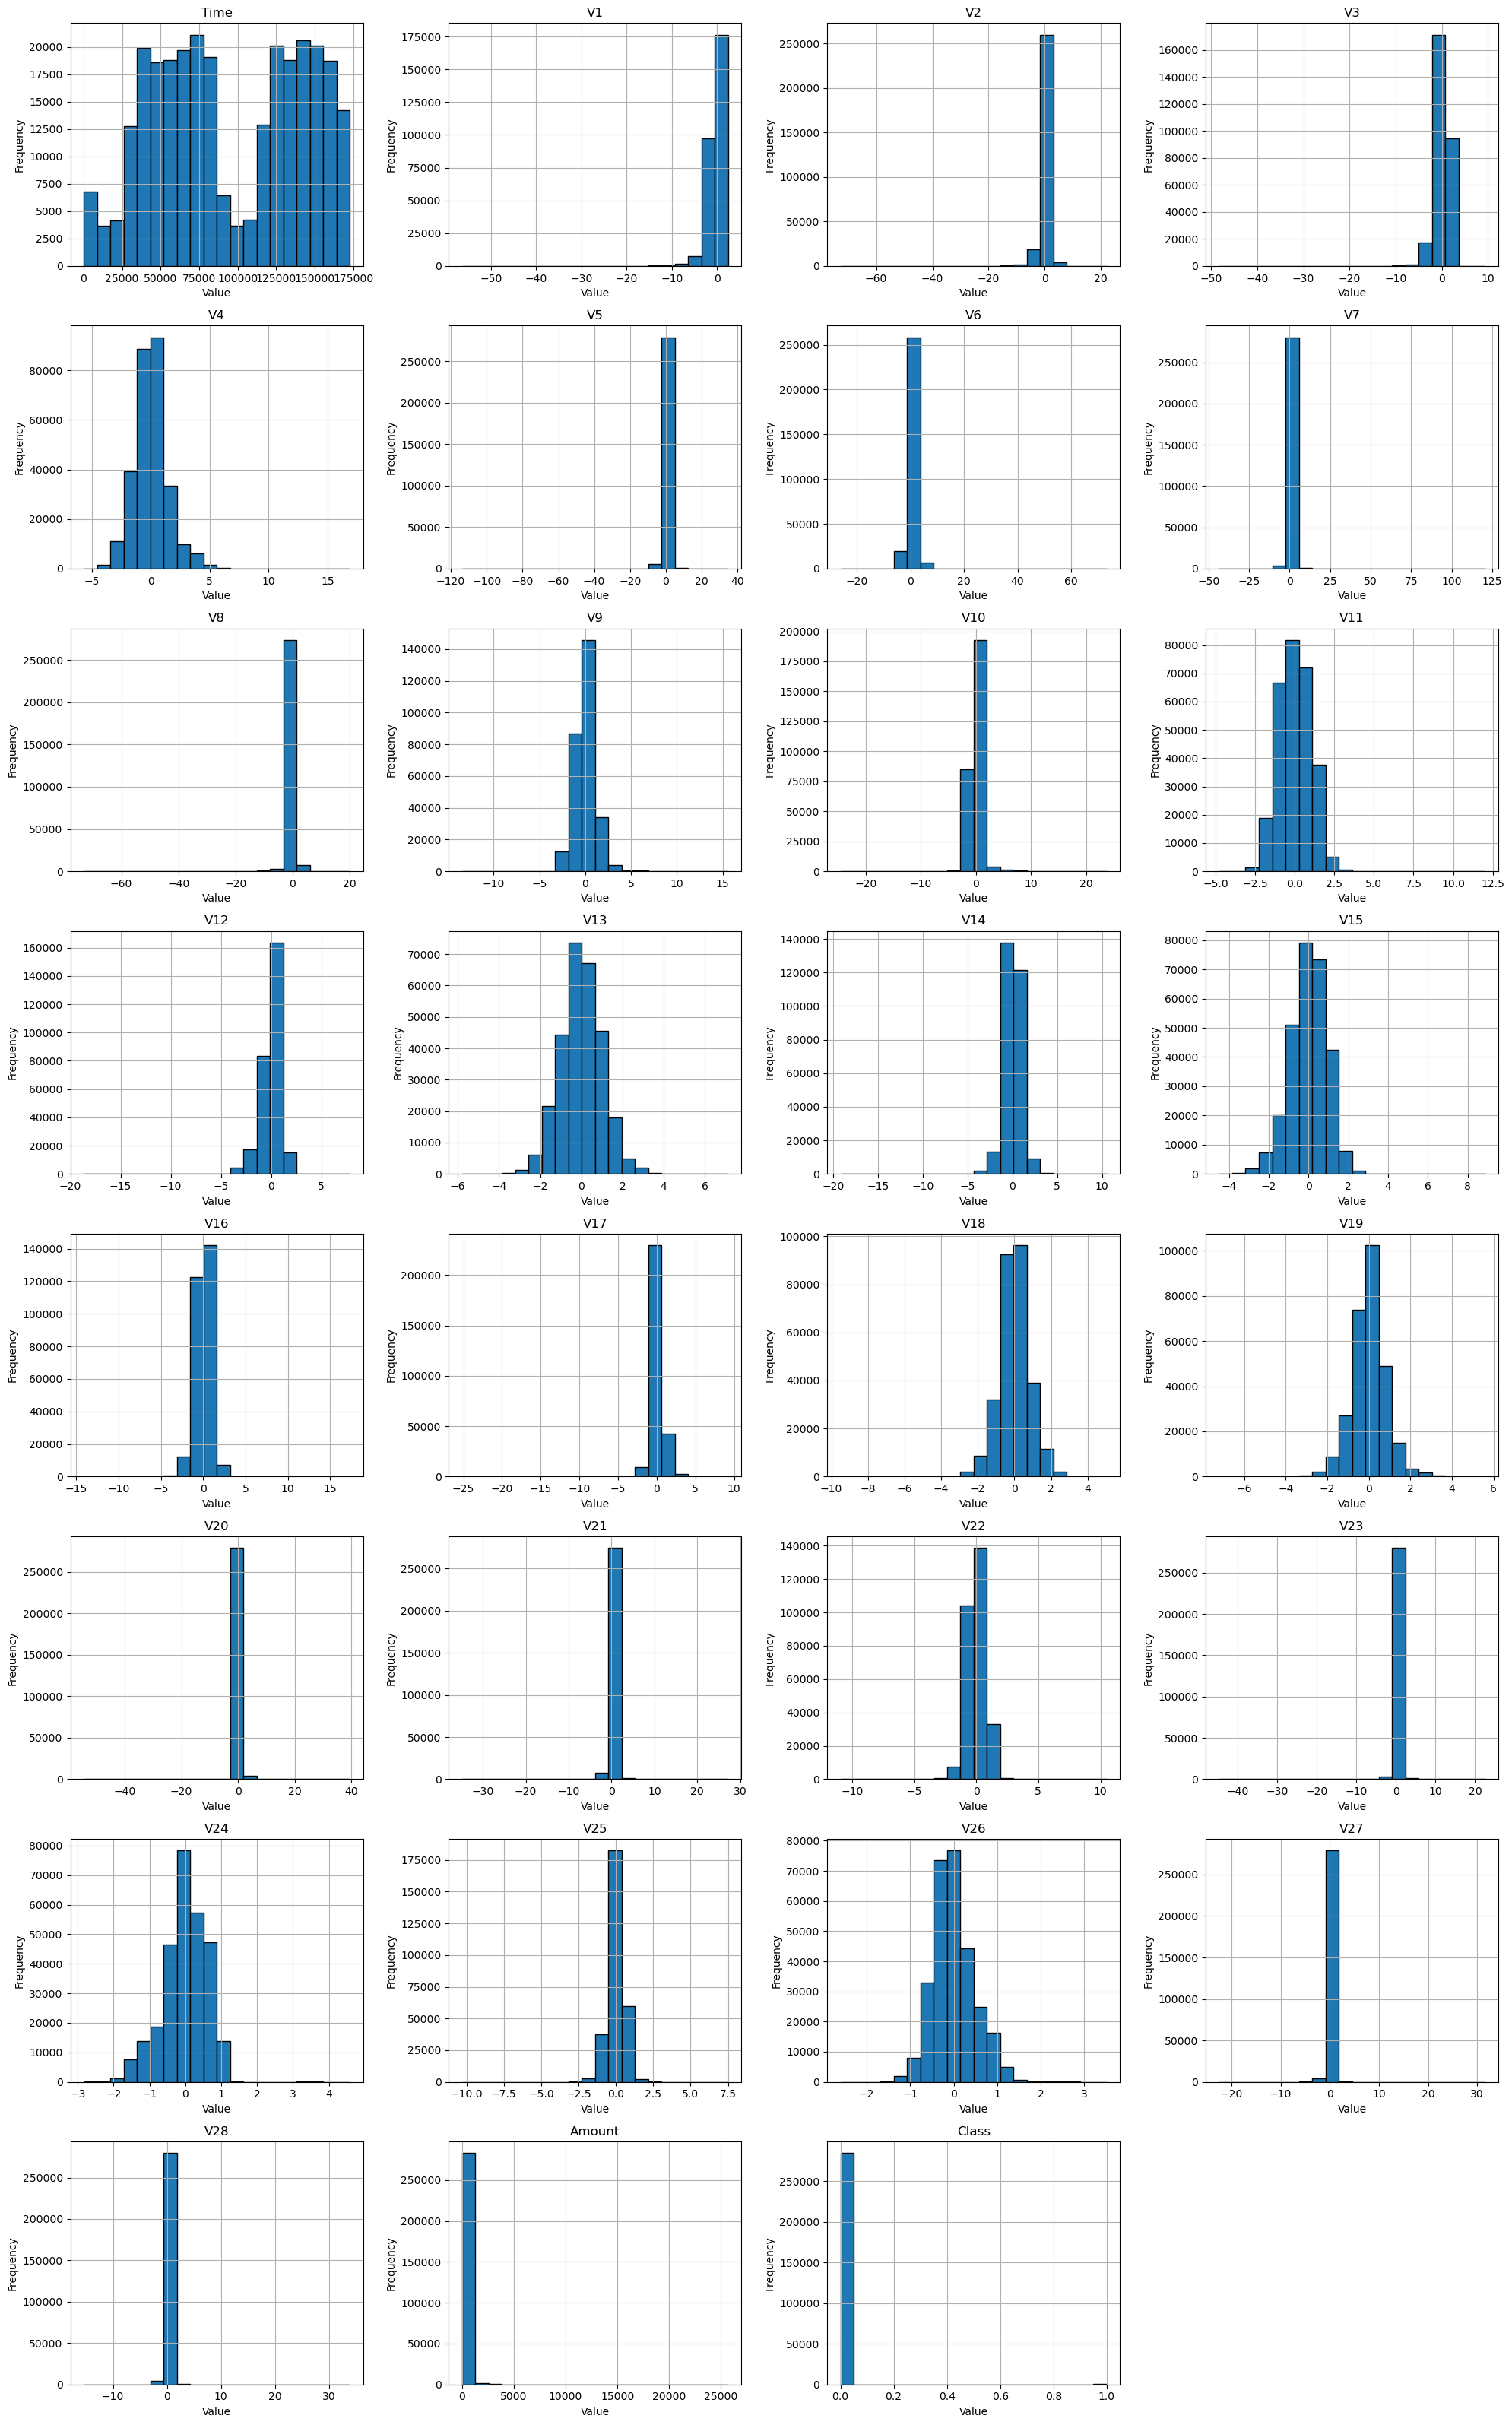

In [12]:
# Menghitung jumlah variabel
num_vars = df.shape[1]

# Menentukan jumlah baris dan kolom untuk grid plot
n_cols = 4
n_rows = -(-num_vars // n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))

axes = axes.flatten()

for i, column in enumerate(df.columns):
  df[column].hist(ax=axes[i], bins=20, edgecolor='black')
  axes[i].set_title(column)
  axes[i].set_xlabel('Value')
  axes[i].set_ylabel('Frequency')

for j in range(i + 1, len(axes)):
  fig.delaxes(axes[j])

  plt.tight_layout()
  plt.show()


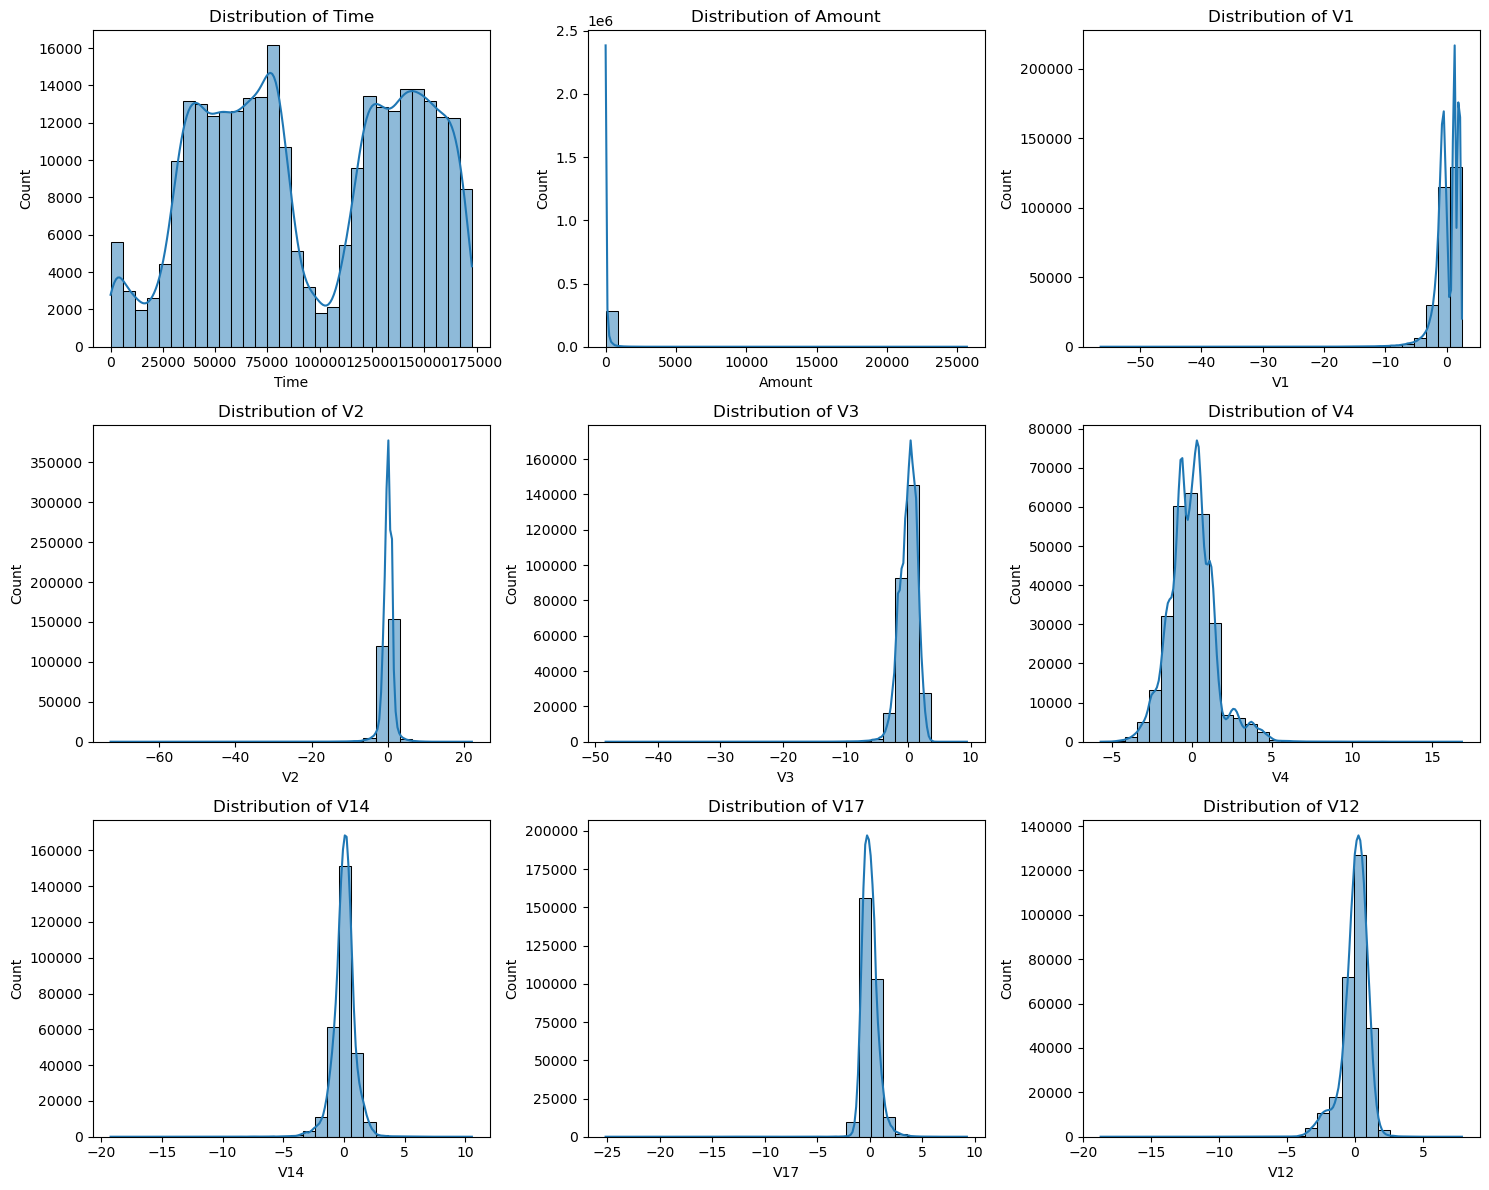

In [13]:
columns_to_plot = ['Time', 'Amount', 'V1', 'V2', 'V3', 'V4', 'V14', 'V17', 'V12']

plt.figure(figsize=(15, 12))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

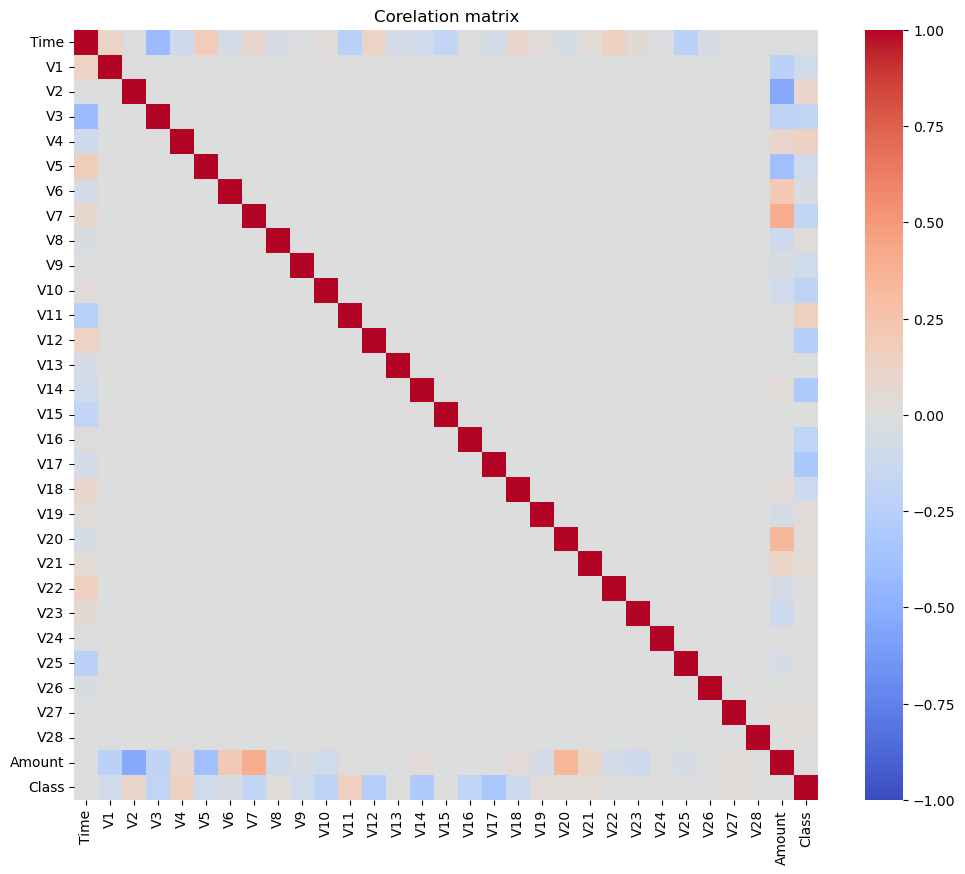

In [14]:
#visualisasi korelasi
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Corelation matrix')
plt.show()

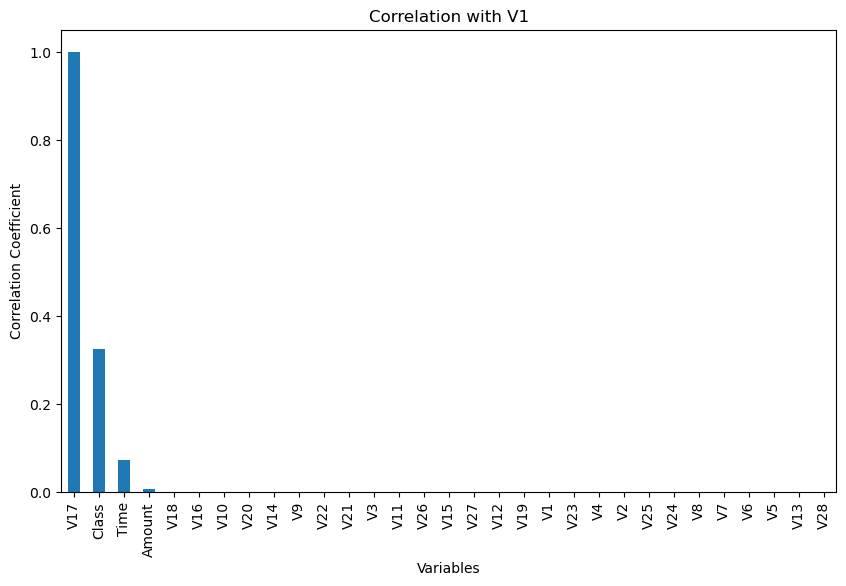

In [15]:
# Menghitung korelasi antara variabel target dan semua variabel lainnya
target_corr = df.corr()['V17']



# (Opsional) Mengurutkan hasil korelasi berdasarkan korelasi
target_corr_sorted = target_corr.abs().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
target_corr_sorted.plot(kind='bar')
plt.title(f'Correlation with V1')
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')
plt.show()

Kolom yang paling discriminative untuk fraud detection : V14, V12, V17

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [16]:
# Memeriksa jumlah nilai yang hilang di setiap kolom
all_missing = df.isnull().sum()
missing_values = all_missing[all_missing > 0]
print("Kolom dengan Missing Values:")
print(missing_values)

Kolom dengan Missing Values:
Series([], dtype: int64)


In [17]:
# Mengecek duplikasi baris dalam dataset
duplicate_rows = df.duplicated().sum()
df[df.duplicated()].head()
print(f"Jumlah baris duplikat: {duplicate_rows}")

Jumlah baris duplikat: 1081


In [18]:
# Menghapus Baris Duplikat
df = df.drop_duplicates()
print(duplicate_rows)
print(f"Jumlah baris setelah menghapus duplikat: {df.shape[0]}")

1081
Jumlah baris setelah menghapus duplikat: 283726


##### Standardisasi

In [19]:
# Pisahkan features dan target
X = df.drop('Class', axis=1)
y = df['Class']

# StandardScaler untuk Time dan V1-V28
standard_cols = ['Time'] + [f'V{i}' for i in range(1, 29)]
scaler_standard = StandardScaler()
X[standard_cols] = scaler_standard.fit_transform(X[standard_cols])

# RobustScaler untuk Amount (karena potential outliers)
robust_cols = ['Amount']
scaler_robust = RobustScaler()
X[robust_cols] = scaler_robust.fit_transform(X[robust_cols])

# Gabungkan kembali
df_scaled = pd.concat([X, y], axis=1)

print("Standardisasi selesai!")
print("Time & V1-V28: StandardScaler (mean=0, std=1)")
print("Amount: RobustScaler (robust terhadap outliers)")

Standardisasi selesai!
Time & V1-V28: StandardScaler (mean=0, std=1)
Amount: RobustScaler (robust terhadap outliers)


# **6. Model Feature Selection & Engineering**

In [20]:
def create_fraud_features(df):

    # 1. Time-based features
    df['transaction_hour'] = (df['Time'] // 3600) % 24
    df['is_off_hours'] = ((df['transaction_hour'] <= 6) | (df['transaction_hour'] >= 22)).astype(int)

    # 2. Amount behavior
    df['amount_std_score'] = (df['Amount'] - df['Amount'].mean()) / df['Amount'].std()
    df['is_amount_outlier'] = (df['amount_std_score'].abs() > 3).astype(int)

    # 3. V-features interactions (fraud patterns)
    df['v_negative_composite'] = df['V14'] + df['V12'] + df['V17']
    df['v_positive_composite'] = df['V4'] + df['V11'] + df['V2']

    # 4. Ratio features
    df['v14_to_amount'] = df['V14'] / (df['Amount'] + 0.001)
    df['time_to_amount'] = df['Time'] / (df['Amount'] + 0.001)

    # 5. Binary flags
    df['extreme_v14'] = (df['V14'] < df['V14'].quantile(0.01)).astype(int)
    df['extreme_v12'] = (df['V12'] < df['V12'].quantile(0.01)).astype(int)

    return df


df_enhanced = create_fraud_features(df)

correlation_with_target = df_enhanced.corr()['Class'].abs().sort_values(ascending=False)
top_features = correlation_with_target[1:16].index.tolist()

print(f"Selected top {len(top_features)} features:")
print(top_features)

X = df_enhanced[top_features]
y = df_enhanced['Class']

Selected top 15 features:
['v_negative_composite', 'extreme_v14', 'V17', 'extreme_v12', 'V14', 'V12', 'V10', 'v_positive_composite', 'V16', 'V3', 'V7', 'v14_to_amount', 'V11', 'V4', 'V18']


# **7. Data Splitting**

In [21]:
print("DATA SPLITTING")
print(f"Sebelum splitting: {X.shape}")

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"Setelah splitting:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test:  {X_test.shape}, y_test:  {y_test.shape}")

# Validasi distribusi fraud
print("\nDISTRIBUSI FRAUD")
print("Training set:")
print(f"  Normal: {(y_train == 0).sum()} ({(y_train == 0).mean()*100:.2f}%)")
print(f"  Fraud:  {(y_train == 1).sum()} ({(y_train == 1).mean()*100:.2f}%)")

print("Test set:")
print(f"  Normal: {(y_test == 0).sum()} ({(y_test == 0).mean()*100:.2f}%)")
print(f"  Fraud:  {(y_test == 1).sum()} ({(y_test == 1).mean()*100:.2f}%)")

# Pastikan ada fraud cases di kedua set
assert (y_train == 1).sum() > 0, "Tidak ada fraud cases di training set!"
assert (y_test == 1).sum() > 0, "Tidak ada fraud cases di test set!"

print("Splitting berhasil!")

DATA SPLITTING
Sebelum splitting: (283726, 15)
Setelah splitting:
X_train: (226980, 15), y_train: (226980,)
X_test:  (56746, 15), y_test:  (56746,)

DISTRIBUSI FRAUD
Training set:
  Normal: 226602 (99.83%)
  Fraud:  378 (0.17%)
Test set:
  Normal: 56651 (99.83%)
  Fraud:  95 (0.17%)
Splitting berhasil!


# **8. Handling Imbalanced Data**

In [22]:
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

print("Sebelum SMOTE:")
print(f"  Normal: {(y_train == 0).sum()} ({(y_train == 0).mean()*100:.2f}%)")
print(f"  Fraud:  {(y_train == 1).sum()} ({(y_train == 1).mean()*100:.2f}%)")

print("Setelah SMOTE:")
print(f"  Normal: {(y_train_bal == 0).sum()} ({(y_train_bal == 0).mean()*100:.2f}%)")
print(f"  Fraud:  {(y_train_bal == 1).sum()} ({(y_train_bal == 1).mean()*100:.2f}%)")

print(f"\nShape setelah balancing:")
print(f"X_train_bal: {X_train_bal.shape}, y_train_bal: {y_train_bal.shape}")

Sebelum SMOTE:
  Normal: 226602 (99.83%)
  Fraud:  378 (0.17%)
Setelah SMOTE:
  Normal: 226602 (50.00%)
  Fraud:  226602 (50.00%)

Shape setelah balancing:
X_train_bal: (453204, 15), y_train_bal: (453204,)


# **9. Feature Scalling**

In [25]:
scaler = StandardScaler()

# Fit HANYA pada training data
X_train_scaled = scaler.fit_transform(X_train_bal)
# Transform test data (jangan fit!)
X_test_scaled = scaler.transform(X_test)

# Kembalikan ke DataFrame
X_train_final = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_final = pd.DataFrame(X_test_scaled, columns=X.columns)

print("Scaling selesai!")
print(f"X_train_final: {X_train_final.shape}")
print(f"X_test_final:  {X_test_final.shape}")

X_train_final.to_csv('creditcard_train_x.csv', index=False)
X_test_final.to_csv('creditcard_test_x.csv', index=False)
y_train_bal.to_csv('creditcard_train_y.csv', index=False)


Scaling selesai!
X_train_final: (453204, 15)
X_test_final:  (56746, 15)
